In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.shape

(205, 26)

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [9]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [10]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [11]:
# carname change values
# get first word of values
# apply for what function you give in column
df['company']=df['CarName'].apply(lambda x:x.split()[0])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
df['company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
Nissan          1
mercury         1
porcshce        1
vokswagen       1
toyouta         1
Name: company, dtype: int64

In [13]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
df['company'].replace('maxda','mazda',inplace=True)
df['company'].replace('porcshce','porsche',inplace=True)
df['company'].replace('toyouta','toyota',inplace=True)
df['company'].replace('vokswagen','volkswagen',inplace=True)
df['company'].replace('vw','volkswagen',inplace=True)
df['company'].replace('Nissan','nissan',inplace=True)


In [15]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'company'],
      dtype='object')

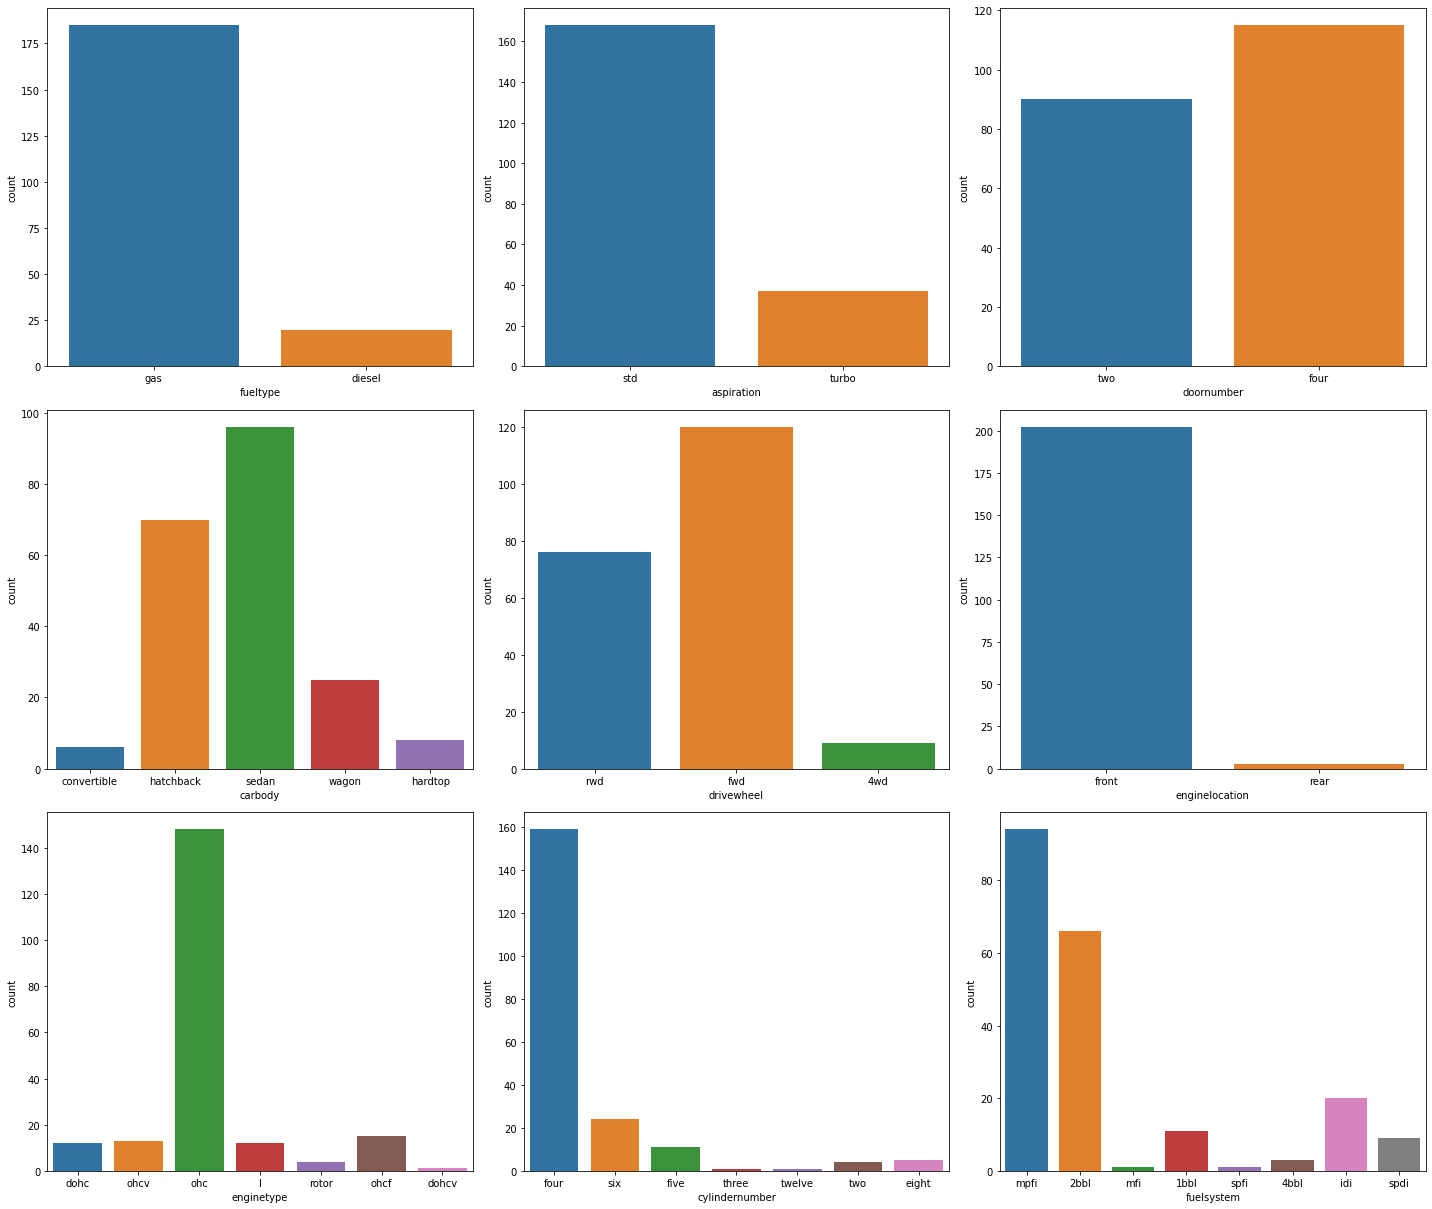

In [17]:
# check repeat values 
catgory=df[['fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
    'enginetype','cylindernumber', 'fuelsystem']]
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,50))
for i in range(len(catgory.columns)):
    plt.subplot(9,3,i+1)
    sns.countplot(x=catgory.columns[i],data=catgory)
plt.tight_layout()
plt.show()


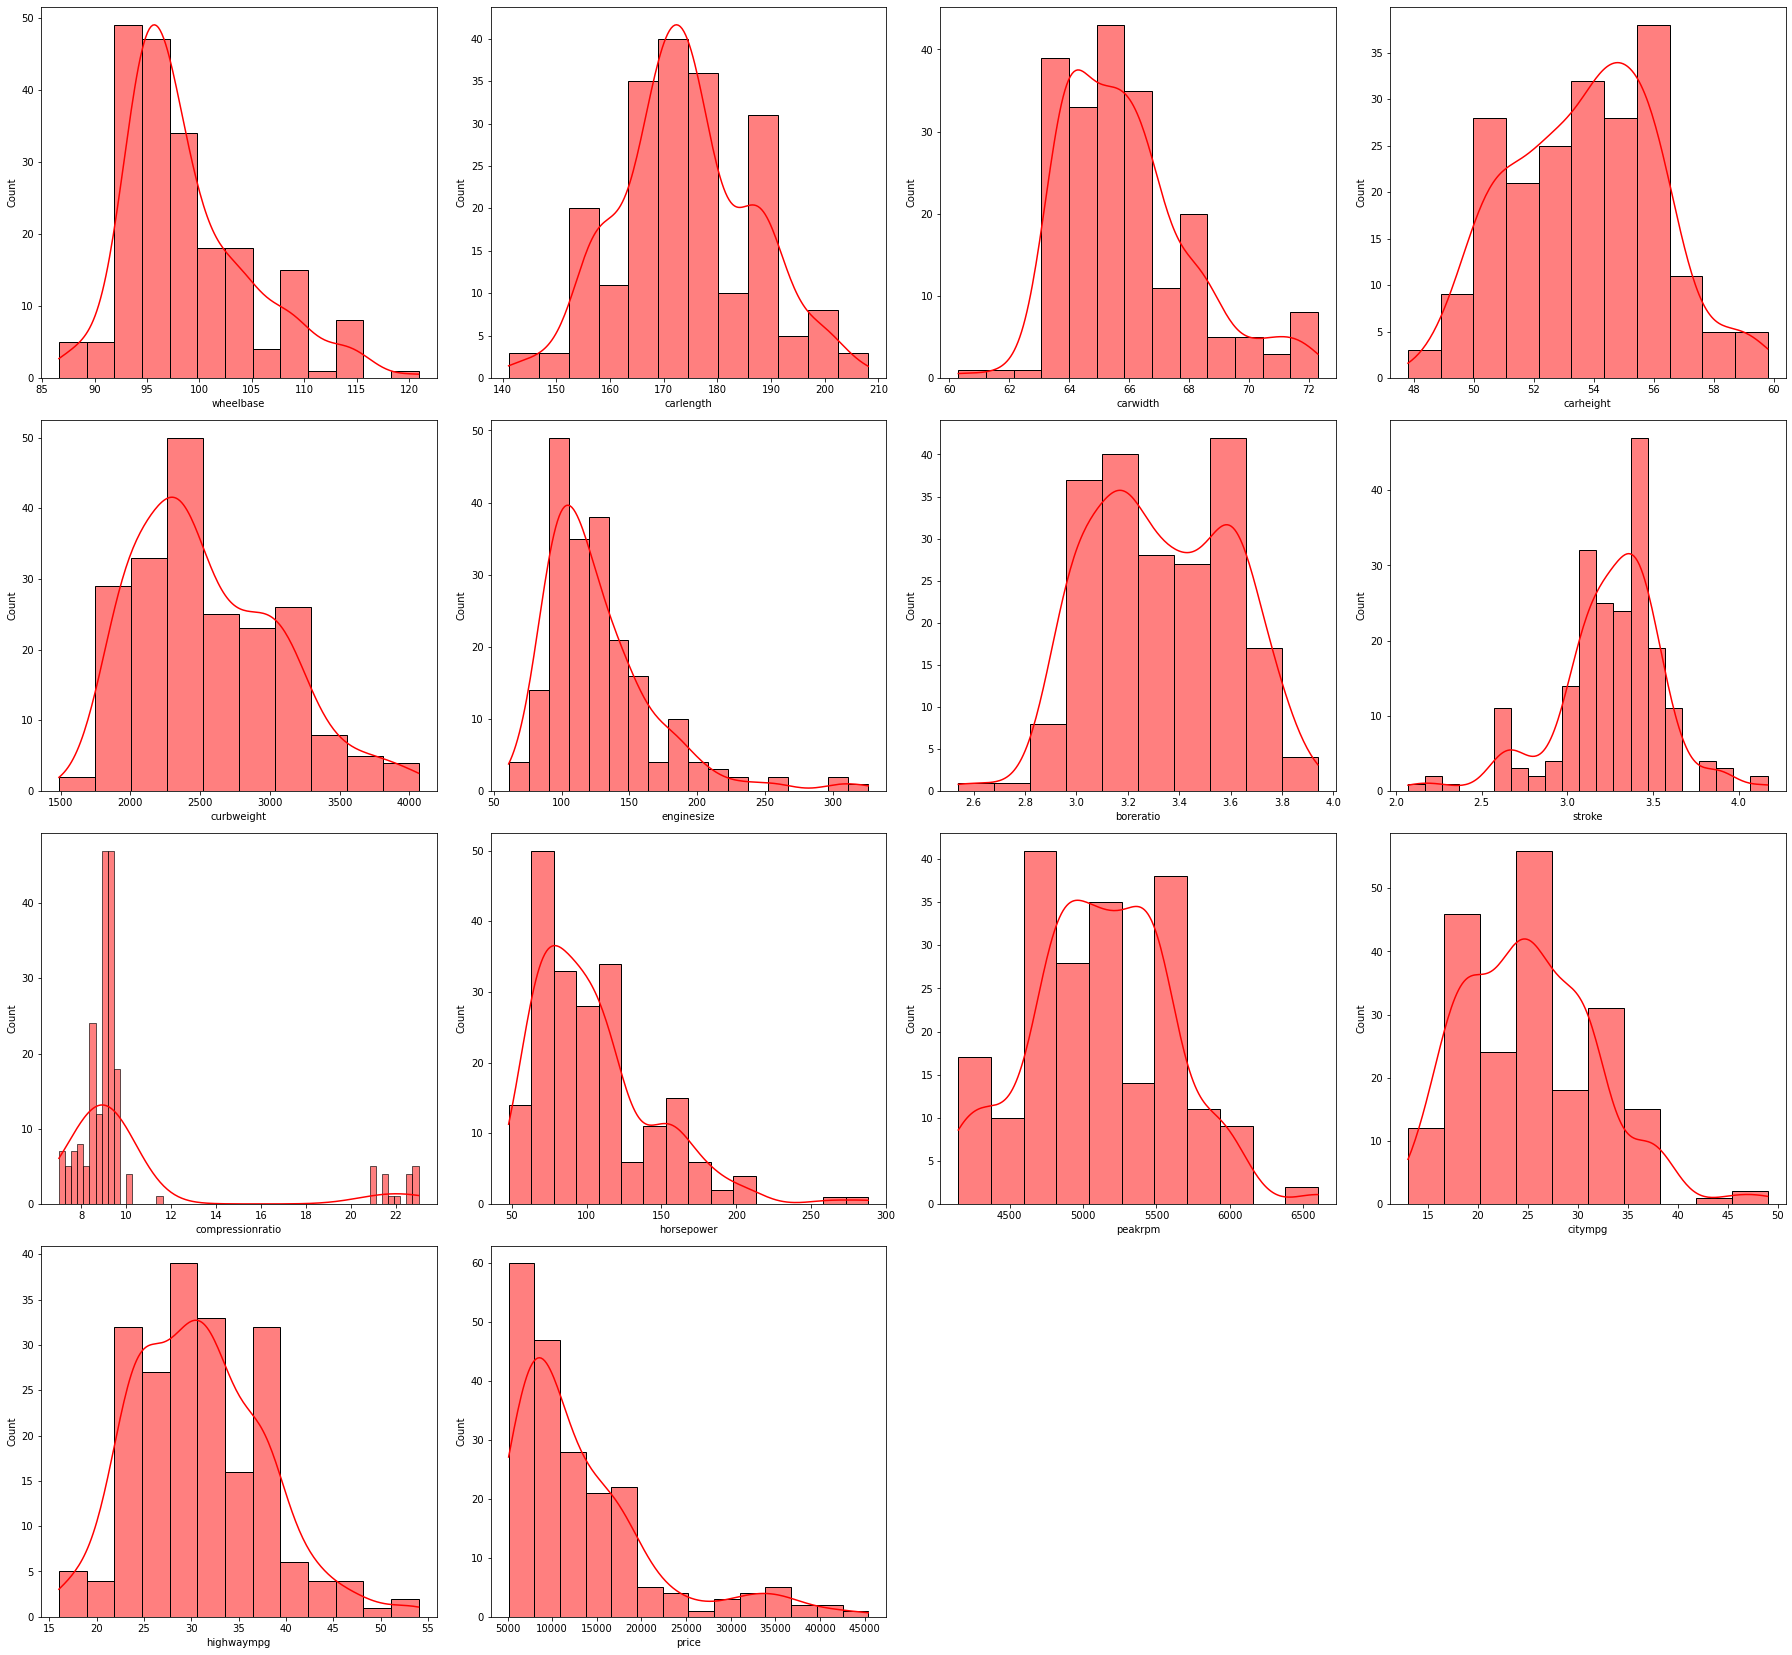

In [18]:
# use scale
numeric=df[['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
        'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]
plt.figure(figsize=(25,80))
for i in range(len(numeric.columns)):
    plt.subplot(14,4,i+1)
    sns.histplot(data=numeric,x=numeric.columns[i],kde=True,color=["red"])
    plt.tight_layout()
plt.show()

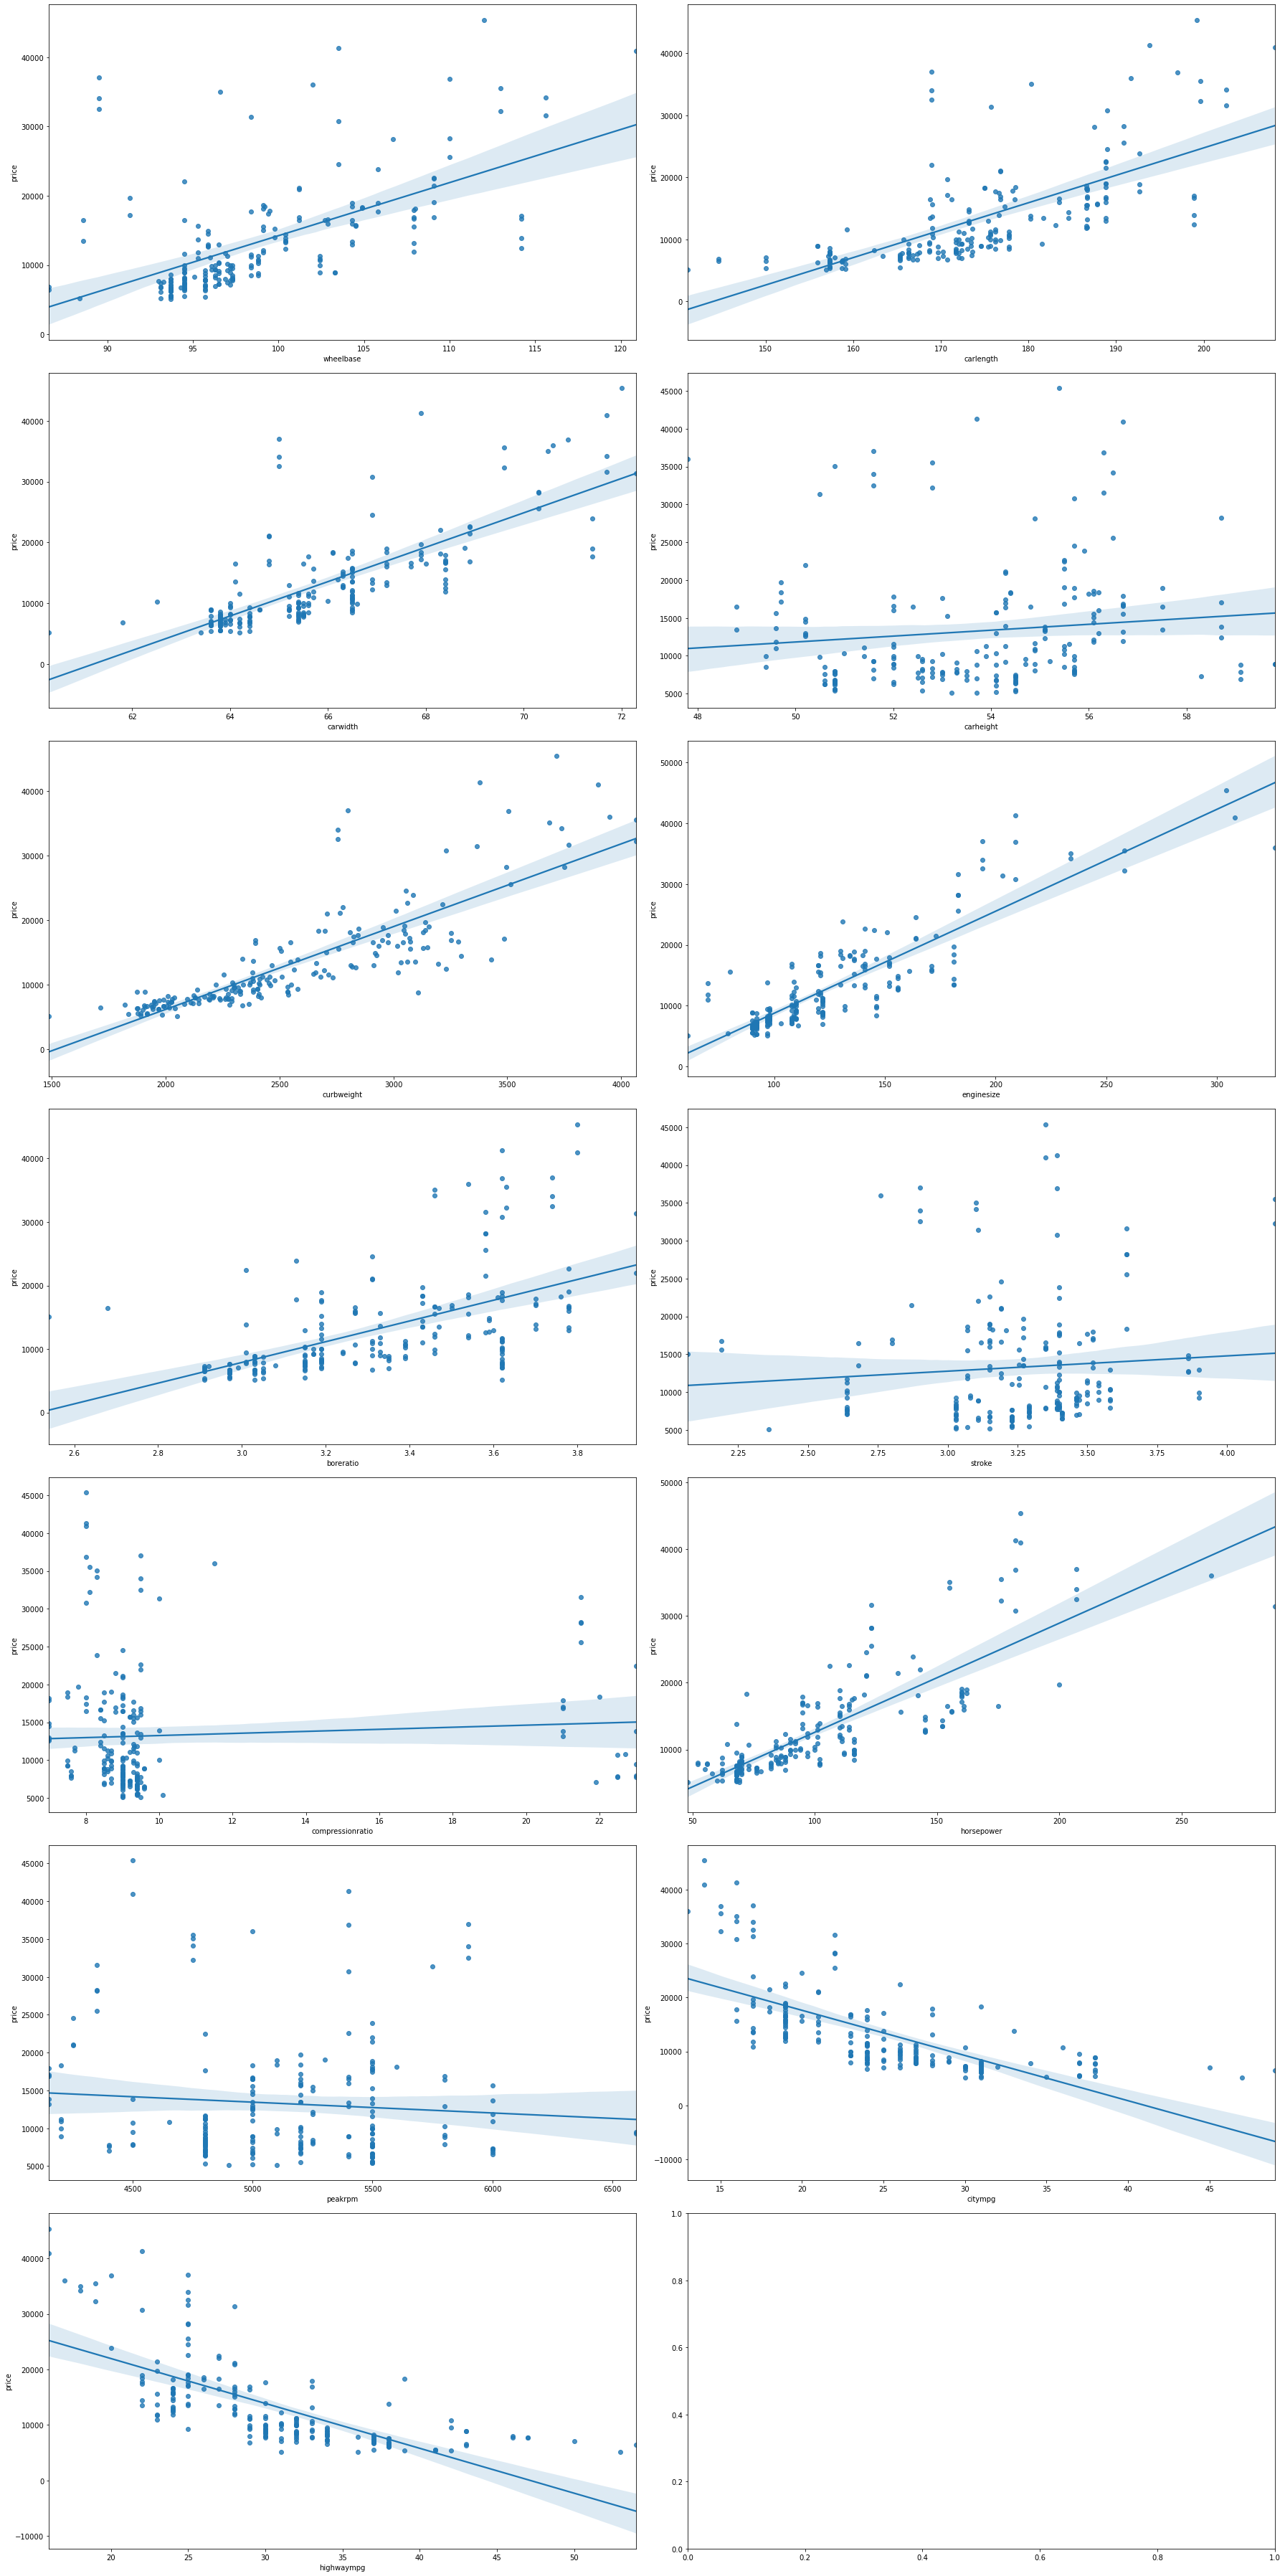

In [19]:
numeric=df[['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
        'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]
plt.figure(figsize=(25,50))
for i in range(len(numeric.columns)):
    plt.subplot(7,2,i+1)
    if numeric.columns[i]=='price':
        continue
    
    sns.regplot(data=numeric,x=numeric.columns[i],y='price')
plt.tight_layout()
plt.show()

In [20]:
# scale values
scale_col=[['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
        'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]
for i in scale_col:
    df[i]=np.log(df[i])

In [21]:
df.drop(columns=['car_ID','CarName','symboling'],inplace=True)


In [22]:
# convert other stgring into numeric data
df=pd.get_dummies(df,drop_first=True)
df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,4.484132,5.128715,4.160444,3.887730,7.843064,4.867534,1.244155,0.985817,2.197225,4.709530,...,0,0,0,0,0,0,0,0,0,0
1,4.484132,5.128715,4.160444,3.887730,7.843064,4.867534,1.244155,0.985817,2.197225,4.709530,...,0,0,0,0,0,0,0,0,0,0
2,4.548600,5.142832,4.182050,3.958907,7.945555,5.023881,0.985817,1.244155,2.197225,5.036953,...,0,0,0,0,0,0,0,0,0,0
3,4.603168,5.173887,4.192680,3.994524,7.756623,4.691348,1.160021,1.223775,2.302585,4.624973,...,0,0,0,0,0,0,0,0,0,0
4,4.599152,5.173887,4.195697,3.994524,7.945910,4.912655,1.160021,1.223775,2.079442,4.744932,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4.692265,5.240688,4.232656,4.016383,7.990238,4.948760,1.329724,1.147402,2.251292,4.736198,...,0,0,0,0,0,0,0,0,0,1
201,4.692265,5.240688,4.231204,4.016383,8.022569,4.948760,1.329724,1.147402,2.163323,5.075174,...,0,0,0,0,0,0,0,0,0,1
202,4.692265,5.240688,4.232656,4.016383,8.010360,5.153292,1.275363,1.054312,2.174752,4.897840,...,0,0,0,0,0,0,0,0,0,1
203,4.692265,5.240688,4.232656,4.016383,8.076205,4.976734,1.101940,1.223775,3.135494,4.663439,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df.shape

(205, 64)

In [24]:
x=df.drop(columns=['price'])
y=df['price']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [35]:
m=LinearRegression()
m.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=m.predict(x_test)

In [37]:
pd.DataFrame({'actual':y_test,'predicted':y_pred})

,actual,predicted
154,8.974365,8.772978
21,8.625509,8.631879
198,9.821192,9.790654
48,10.478695,10.381273
34,8.871926,8.940285
194,9.468079,9.603264
6,9.781885,9.866169
25,8.808668,8.864135
159,8.960339,8.976128
122,8.937087,8.921379


In [38]:
# mean_square_error    :- 
# sum_absolute_error   :-
# mean_absolute_error  :-
# sum_square_error     :-
# r2_score             :-

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9253620707177957
0.019526837842660523


In [40]:
m.coef_

array([ 2.6112875 , -2.32616106,  4.16477967, -2.20496327,  1.31936846,
        0.82070456, -1.45209231, -0.16514711, -0.32800355, -0.08478393,
        0.45147868, -0.2429586 ,  0.25688035, -0.32767844,  0.09889589,
       -0.04663963, -0.16173456, -0.22263306, -0.1467013 , -0.12873972,
       -0.04471443,  0.01493275,  0.46655735, -0.36835145,  0.05855554,
       -0.11684945,  0.14895409, -0.12756587,  0.21899051,  0.04395614,
        0.10764909, -0.1804465 ,  0.52524347, -0.14059671,  0.21899051,
        0.37620883,  0.29262343,  0.32767844,  0.40379523,  0.37641257,
        0.4028865 ,  0.2866274 , -0.0781467 ,  0.54024424, -0.08434171,
       -0.19708506, -0.3397212 ,  0.16416315, -0.01744267, -0.28925201,
       -0.0244362 , -0.01593766, -0.37704912, -0.02346389, -0.46668793,
       -0.32791609,  0.27442241, -0.18970234,  0.29462699, -0.31760326,
       -0.14271816, -0.04307671,  0.03563336])

In [41]:
m.intercept_

-14.224670678014396